# A comparison of two factors for the development of a regression model to predict the City Miles effeciency of vehicles.
## 2.5 CARS2

In this report I am going to compare the efficacy of two variables in predicting the City Miles capabilities for various cars.

**Predictors**
- Engine Size (Liters) - *Eng*
- Volume (Both Interior Passanger and Cargo)(Hundeds of Cubic Feet) - *Vol*

**Response**
- City Gallons Per Hundred Miles - *Cgphm*

The response variable Cgphm is made with the following forumla: 100/Cmpg

### Import & Transform Data

In [3]:
install.packages("tidyverse")
install.packages("gridExtra")
install.packages("nortest")

require(tidyverse)
require(gridExtra)
require("nortest")

options(repr.plot.width=20, repr.plot.height=9)

    cars2_df <- read.table("/Users/jmanderson/statistics/02_intro-to-regression/ARM by Iain - Exercises/data/cars2.csv", 
                           sep=",", header = T, stringsAsFactors = F)

cars2_df[,5] <- 100/ cars2_df[,2]
names(cars2_df)[5] <- "Cmphg"


The downloaded binary packages are in
	/var/folders/tz/875z4smn2sz0kndfn6lyfvf40000gn/T//RtmpK8ESS6/downloaded_packages

The downloaded binary packages are in
	/var/folders/tz/875z4smn2sz0kndfn6lyfvf40000gn/T//RtmpK8ESS6/downloaded_packages

The downloaded binary packages are in
	/var/folders/tz/875z4smn2sz0kndfn6lyfvf40000gn/T//RtmpK8ESS6/downloaded_packages


Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: nortest



## Model for Engine Size

In [4]:
# Create the linear regression and print summary
lmEng = lm(Cmphg~Eng, data = cars2_df[]) 
summary(lmEng)


Call:
lm(formula = Cmphg ~ Eng, data = cars2_df[])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.61401 -0.22593 -0.04419  0.15520  1.32962 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.5894     0.1026   25.24   <2e-16 ***
Eng           0.8183     0.0397   20.61   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3351 on 125 degrees of freedom
Multiple R-squared:  0.7726,	Adjusted R-squared:  0.7708 
F-statistic: 424.8 on 1 and 125 DF,  p-value: < 2.2e-16


## Model for Interior & Cargo Volume

In [5]:
# Create the linear regression and print summary
lmVol = lm(Cmphg~Vol, data = cars2_df[]) 
summary(lmVol) 


Call:
lm(formula = Cmphg ~ Vol, data = cars2_df[])

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2039 -0.4521 -0.1067  0.3734  2.3482 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.8760     0.5337   3.515 0.000613 ***
Vol           2.5010     0.4849   5.157 9.53e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6382 on 125 degrees of freedom
Multiple R-squared:  0.1755,	Adjusted R-squared:  0.1689 
F-statistic:  26.6 on 1 and 125 DF,  p-value: 9.527e-07


## Fitted Line Plots
### + create a new Dataframe to store all Model, Fortfify and Predict values

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



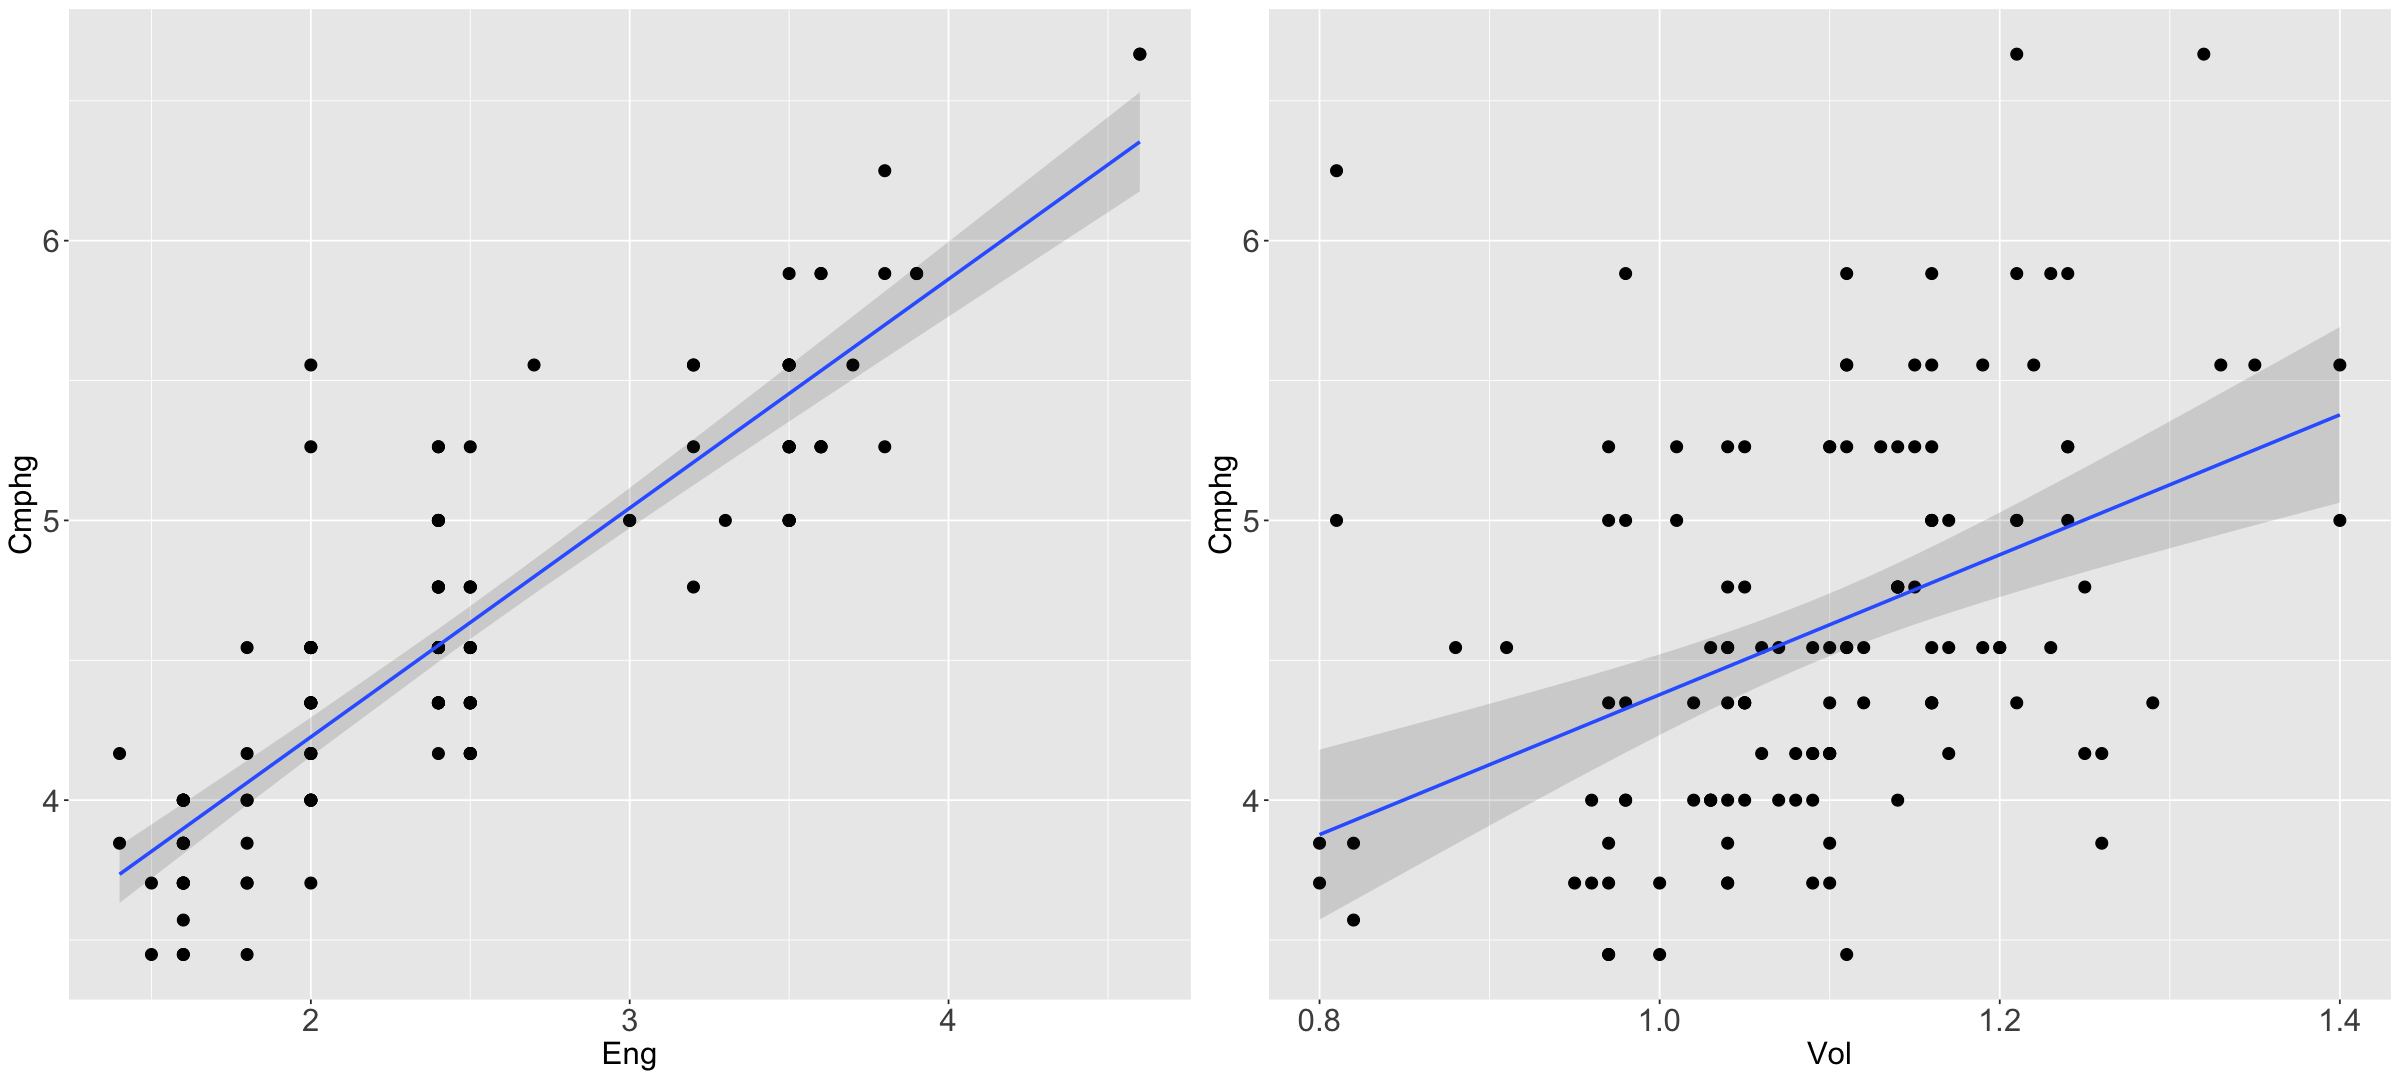

In [7]:
predsEng = predict(lmEng, interval = "confidence")
predsVol = predict(lmVol, interval = "confidence")

fortifyEng = fortify(lmEng)
fortifyVol = fortify(lmVol)

modEng <- cbind(fortifyEng,predsEng)
modVol <- cbind(fortifyVol,predsVol)

# summary(modVol)

theme <- theme(
        axis.text=element_text(size = rel(1.7)),
        axis.title=element_text(size = rel(1.7)),
        plot.title=element_text(size = rel(2))
    )
points <- geom_point(size=3)
smooth <- stat_smooth(method="lm", level=0.95)
geom_ribbon <- geom_ribbon( aes(ymin = lwr, ymax = upr), alpha = .15) 

plotEng <- ggplot(modEng, aes(x=Eng, y=Cmphg)) + points + theme + geom_ribbon + 
    geom_smooth(aes(x=Eng, y=.fitted))

plotVol <- ggplot(modVol, aes(x=Vol, y=Cmphg)) + points + theme + geom_ribbon +
    geom_smooth(aes(x=Vol, y=.fitted)) 

grid.arrange(plotEng, plotVol, ncol=2)

## Comparisons of Models

- M1: Cmphg = b0 + b1(Eng) 
- M2: Cmphg = b0 + b1(Vol)

#### S (Regression Standard Error)
- $S_{M1}$=0.3351 vs $S_{M2}$=0.6382
- This means there is a smaller error when using Engine size to Predict City Miles (Per Hundred Gallon) than when using car Volume.
- Another way of phrasing this is that fitted values further away from predicted values on average in the second model. 

#### R2 (Coefficient of Determination)
- $R2_{M1}$=77% vs $R2_{M2}$=17%
- The R2 is also much larger when Engine size is the input variable, meaning more variation around the mean of City Miles (per hundred gallon) is explained from its linear relationship with Engine Size, than its linear relationship with Car Volume.
- This can also be thought of as, more of the variation in city miles (per hundred gallon) is explained via the linear assoication with engine size than car volume.

#### Slope of $b_{1}$
- $T_{M1}$=20.61 $T_{M2}$=5.157
- The test statistic for zero population slope is much higher for Engine size than Car Volume.
- This confirms that the slope is taller for engine sizes than car volume, meaning that there is a larger association between engine size and city miles (per hundred gallon) than car volume

## Residual Plots

In [ ]:
plotResidEng <- ggplot(modEng, aes(x = .fitted, y = .resid)) + points + theme + 
    ggtitle("Engine Size - Resid Vs Fit") +
    geom_hline(yintercept = 0)
plotResidVol <- ggplot(modVol, aes(x = .fitted, y = .resid)) + points + theme + 
    ggtitle("Car Volume - Resid Vs Fit") +
    geom_hline(yintercept = 0)

grid.arrange(plotResidEng, plotResidVol, ncol=2)

## QQ Plots

In [ ]:
qqVol <- ggplot(modEng, aes(sample=.resid)) + 
    stat_qq() +
    theme +
    geom_qq_line(line.p = c(0.25, 0.75), col = "blue") + 
    ggtitle("QQ Plot - Engine Size") 

qqEng <- ggplot(modVol, aes(sample=.resid)) + 
    stat_qq() + 
    theme +
    geom_qq_line(line.p = c(0.25, 0.75), col = "blue") +
    ggtitle("QQ Plot - Car Volume")

grid.arrange(qqVol, qqEng, ncol=2)

In [ ]:
# Not recommended as sample size is large and even small deviations from normality will produce a failed test
ad.test(modVol$.resid) 
ad.test(modEng$.resid)

## Model Assumptions

With respect to the model errors and model assumptions the following observations were made:
- **Zero Mean**: A mean close to zero seems to be present for both models, with a slight deviation caused by approx 2 observations in the engine size model with the lower values.
- **Constant Variance**: Data looks to be homoscedastic, with very little noticable deviation in variance from the left to right of the graph in both models.
- **Normality**: Slight deviations from Normality noticed in both models, but nothing significant.
- **Independance**: No patterns noticed in residuals vs fitted graphs for both models. 

## Model Interpretations
- Model 1 shows that for each 1 litre increase in Engine size you can expect a 0.818 increase in car miles per 100 gallon on average. 
- So for a car with an engine size of 2.4 we can expect the following city miles per 100 gallon.
- We can also quantify our certainty on this point estimate with a confidence interval. 

## Predict a population average
- Confidence Interval: ${\hat{Y}}$ ±t-percentile($S_{\hat{Y}}$)

In [36]:
b0 <- 2.58942273998879 # intercept
b1 <- 0.818255593593726 # slope
xp <- 3 # X to predict
y <- b0 + b1*(xp) # point estimate for eng=3

mx <- mean(modEng$Eng) # mean for all x values
s <- 0.3351 # regression standard error

sq_diff <- (xp-mx)^2 # squared difference between predictor x and mean of x
ss_error = 0 # sum of squared errors for x value
for(xi in modEng$Eng) { 
    ss_error = ss_error + (xi-mx)^2
} 

n_scale <- 1/125
s_yhat <- s*sqrt(n_scale+(sq_diff/ss_error))

In [37]:
cat('95% CI:(',y-1.96*s_yhat,',', y+1.96*s_yhat,')')

95% CI:( 4.972558 , 5.115821 )

##### Estimated vs Observed Values
We can also use the lm.predict() variables in our DataFrame to confirm the best point estimate and confidence interval script above.


In [38]:
filter(modEng, Eng==3)

Cmphg,Eng,.hat,.sigma,.cooksd,.fitted,.resid,.stdresid,fit,lwr,upr
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,3,0.01176865,0.3364498,0.0001047621,5.04419,-0.04418952,-0.1326427,5.04419,4.972238,5.116142
5,3,0.01176865,0.3364498,0.0001047621,5.04419,-0.04418952,-0.1326427,5.04419,4.972238,5.116142


## Predict a population single value
Lets continue with the example of cars with engine sizes of 2.4 Litres, but this time in the context of a prediction on a single vehicles performance. Here we can also make a point estimate, which will be the same as the estimate for mean, but we will also calculate a wider prediction interval for this estimate.
- Confidence Interval: ${\hat{Y}}$ ±t-percentile($S_{\hat{Y}*}$)
- $S_{\hat{Y}*}$: Standard Error for Prediction
- We can also make the approximation that about 95% of the observed Y-values lie within ±2s of their fitted ${\hat{Y}}$-values. 


In [40]:
s_ystar <- s*sqrt(1 + n_scale+(sq_diff/ss_error))
cat('95% PI:(',y-1.96*s_ystar,',', y+1.96*s_ystar,')')

95% PI:( 4.383499 , 5.70488 )